In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, stdev, median
import seaborn as sns


In [ ]:
#1257.4986072423399
#1253.6731382585315

In [19]:
prefix = '../../experiments/bc/tanker_speed_10secs#4096,2048,256,32-steps7-seed5/steps7#4096,2048,256,32#seed5.csv'
title = 'BC_5epochs_256,128,64neurons'

runs = []
#runs.append(pd.read_csv(prefix.replace('ß', '5')))
#runs.append(pd.read_csv(prefix.replace('ß', '6')))
#runs.append(pd.read_csv(prefix.replace('ß', '7')))
#runs.append(pd.read_csv(prefix.replace('ß', '8')))
#runs.append(pd.read_csv(prefix.replace('ß', '9')))

runs.append(pd.read_csv(prefix))

perf_sum = runs[0]["performance"]
idx = 0
for run in runs:
    if idx != 0:
        perf_sum + run["performance"]
    run["mean_distance"] = 0
    for i in range(0, len(run["distances"])):
        # hacky way to convert strings that represent list back to true lists of floats
        run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
        run["mean_distance"][i] = mean(run["distances"][i])
    
    # # filter out extreme outliers
    # runs[idx] = run[run["mean_distance"] < 600]
    idx += 1

mean_perfs = perf_sum / len(runs)
tmp = runs[0]["mean_distance"]
[tmp := tmp + x["mean_distance"] for x in runs[1:]]
mean_dists = tmp / len(runs)
print(mean(mean_dists))
print(stdev(mean_dists))

2024.1862464183382
1964.1860565226202


/tmp/ipykernel_565/3197047778.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
/tmp/ipykernel_565/3197047778.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["mean_distance"][i] = mean(run["distances"][i])


<AxesSubplot:xlabel='mean_distance', ylabel='Count'>

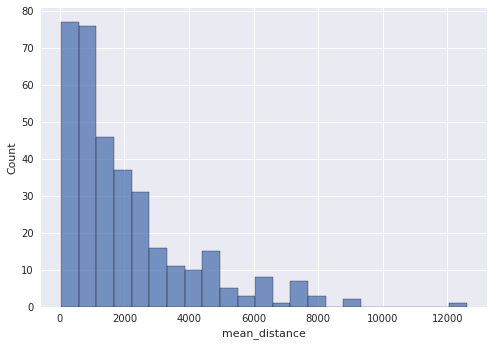

In [20]:
sns.histplot(x=mean_dists)

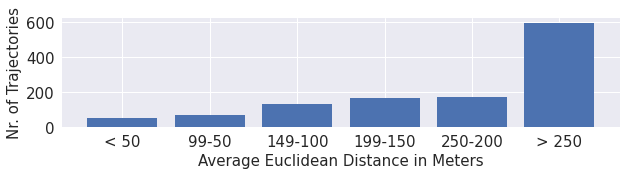

In [4]:
labels = ['< 50', '99-50' ,'149-100' , '199-150','250-200', '> 250' ]
n_trajs = []

n_trajs.append(len(mean_dists[mean_dists < 500]))
n_trajs.append(len(mean_dists[(mean_dists >= 500) & (mean_dists <= 999)]))
n_trajs.append(len(mean_dists[(mean_dists >= 1000) & (mean_dists <= 1999)]))
n_trajs.append(len(mean_dists[(mean_dists >= 2000) & (mean_dists <= 2999)]))
n_trajs.append(len(mean_dists[(mean_dists >= 3000) & (mean_dists <= 3999)]))
n_trajs.append(len(mean_dists[mean_dists > 4000]))

plt.figure(figsize=(10,2))
plt.style.use('seaborn')
plt.bar(labels,n_trajs)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times'
plt.ylabel("Nr. of Trajectories", fontsize=15)
plt.xlabel("Average Euclidean Distance in Meters", fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [32]:
print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))

178.04606407050136
147.96060081270227
147.6


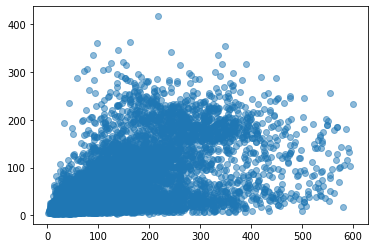

In [124]:
a = runs[0][(runs[0]["mean_distance"] < 150) & (runs[0]["ep_length"] < 150)]
plt.scatter(runs[0]["mean_distance"], runs[0]["ep_length"], alpha=0.5)
plt.show()

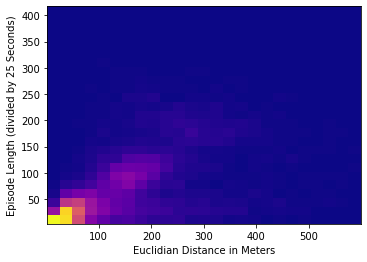

In [128]:
heatmap, xedges, yedges = np.histogram2d(runs[0]["mean_distance"], runs[0]["ep_length"],bins=25, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="plasma")
plt.xlabel("Euclidian Distance in Meters")
plt.ylabel("Episode Length (divided by 25 Seconds)")
plt.show()